**Curso de Inteligencia Artificial y Aprendizaje Profundo**


# Ejemplo  de Autoencoder  MNIST

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Contenido

* [Introducción](#Introducción)
* [El modelo lineal de clasificación](#El-modelo-lineal-de-clasificación)
* [Importar los módulos requeridos](#Importar-los-módulos-requeridos)
* [Carga del conjunto de datos Iris](#Carga-del-conjunto-de-datos-Iris)
* [Acercamiento descriptivo a los datos](#Acercamiento-descriptivo-a-los-datos)
* [Separa features y targets](#Separa-features-y-targets)
* [Divide los datos: entrenamiento y validación](#Divide-los-datos:-entrenamiento-y-validación)
* [Normaliza los datos](#Normaliza-los-datos)
* [Construye la tuberia (pipeline) para la alimentación de datos de Tensorflow](#Construye-la-tuberia-(pipeline)-para-la-alimentación-de-datos-de-Tensorflow)
* [Entrenamiento del Modelo](#Entrenamiento-del-Modelo)
* [Predicciones](#Predicciones)
* [Validación](#Validación)



# Introducción

En este cuaderno se implementa un Autoencoder  para el conjunto de datos MINIST. La implmentación se base en el uso de capas densas. 

Se muestran dos implementaciones:

1. Modelo API funcional de tf.eras
2. Modelo Orientado a objetos (subclassing)

Adicionalmente, al final se muestra la implementación de un algortimo de entrenamiento personalizado.

## Autocodificador o autoencoder



<figure>
<center>
<img src="../Imagenes/Autoencoder_structure.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Estructura de un Autoencoder </p>
</figcaption>
</figure>

Imagen tomada de [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder#/media/File:Autoencoder_structure.png)


Un autoencoder es un tipo de red neuronal artificial utilizada para aprender codificaciones de datos eficientes en sin supervisión manera.

El objetivo de un codificador automático es aprender una representación (codificación) de un conjunto de datos, normalmente para la reducción de dimensionalidad.

Junto con el lado de reducción, se aprende un lado de reconstrucción, donde el decodificador automático intenta generar a partir de la codificación reducida una representación lo más cercana posible a su entrada original, de ahí su nombre.


Adaptado de [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder).

# Importa módulos

In [22]:
from __future__ import absolute_import, division, print_function
#
import tensorflow as tf
#
from tensorflow.keras.layers import Input, Dense, Activation,  LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
# 
import numpy as np
import matplotlib.pyplot as plt

## Parámetros de la red

In [3]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2 
    
# Train parameters
epochs = 3
batch_size=64


## Modelo API funcional

### Codificador

Model: "dense_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
activation_26 (Activation)   (None, 784)               0         
_________________________________________________________________
hidden_layer_1_e (Dense)     (None, 128)               100480    
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
_________________________________________________________________
hidden_layer_2_e (Dense)     (None, 64)                8256      
_________________________________________________________________
activation_28 (Activation)   (None, 64)                0         
_________________________________________________________________
hidden_layer_3_e (Dense)     (None, 32)              

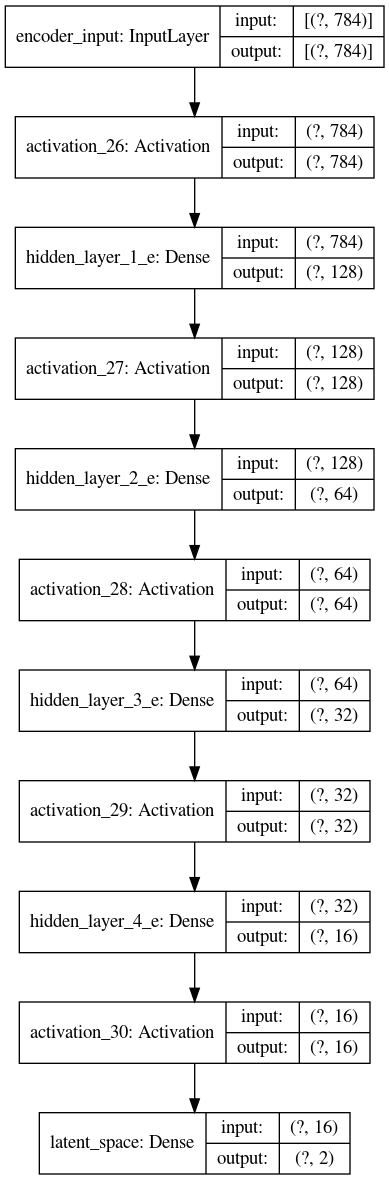

In [37]:
# Define encoder model
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)
#outputs = LayerNormalization(axis=1)(x)

encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')

encoder.summary()
plot_model(encoder, to_file='../Imagenes/encoder_dense_minist.png', 
           show_shapes=True)

## Decodificador

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
hidden_layer_de_4_d (Dense)  (None, 16)                48        
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________
hidden_layer_de_3_d (Dense)  (None, 32)                544       
_________________________________________________________________
activation_22 (Activation)   (None, 32)                0         
_________________________________________________________________
hidden_layer_de_2_d (Dense)  (None, 64)                2112      
_________________________________________________________________
activation_23 (Activation)   (None, 64)                0   

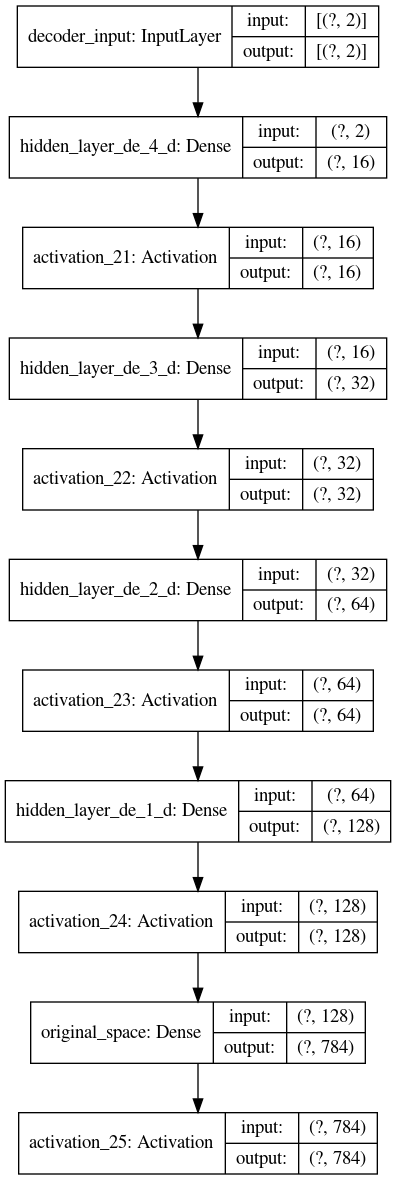

In [8]:
# Define decoder model
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='decoder')

decoder.summary()
plot_model(decoder, to_file='../Imagenes/decoder_dense_minist.png', 
           show_shapes=True)

## Auto-codificador

Model: "autoencoder_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_encoder (Model)        (None, 2)                 111378    
_________________________________________________________________
decoder (Model)              (None, 784)               112160    
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


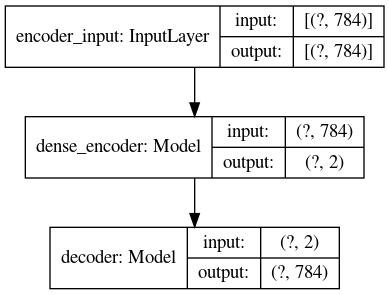

In [38]:
# Autoencoder Model
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_model')

#Summary
autoencoder.summary()
plot_model(autoencoder,
           to_file='../Imagenes/autoencoder_dense_mnist.png',
           show_shapes=True)

## Compila

In [39]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

## Carga los datos

In [40]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

epochs = 20
batch_size = 64

## Entrenamiento

In [41]:
# Train
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 10s 190us/sample - loss: 0.0493 - val_loss: 0.0442
Epoch 2/20
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0434 - val_loss: 0.0415
Epoch 3/20
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0415 - val_loss: 0.0400
Epoch 4/20
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0402 - val_loss: 0.0391
Epoch 5/20
54000/54000 [==============================] - 9s 167us/sample - loss: 0.0395 - val_loss: 0.0381
Epoch 6/20
54000/54000 [==============================] - 9s 166us/sample - loss: 0.0388 - val_loss: 0.0379
Epoch 7/20
54000/54000 [==============================] - 9s 169us/sample - loss: 0.0384 - val_loss: 0.0373
Epoch 8/20
54000/54000 [==============================] - 9s 168us/sample - loss: 0.0379 - val_loss: 0.0371
Epoch 9/20
54000/54000 [==============================] - 9s 166us/sample - loss: 0.03

## Evaluación externa

In [42]:
# External evaluation
autoencoder.evaluate(x_test,x_test) # 0.0361
autoencoder.evaluate(x_train,x_train) # 0.0358

60000/60000 [==============================] - 8s 131us/sample - loss: 0.0358


0.03581784775058428

## Recuperación de imágenes

In [31]:
def reconstruction_image(img_original, img_decoded, image_size=28, num_images=8, random=True, file_name=None):
    
    # control number of images, maximum is  16. 
    if num_images > 16:
        num_images = 16
    
    # select images
    if random:
        shape_0 = img_original.shape[0]
        index = np.random.randint(low=0, high=shape_0, size=num_images)
    else:
        index = range(num_images) # first images
    
    # prepare data
    imgs = np.concatenate([img_original[index], img_decoded[index]])
    imgs = imgs.reshape((2, num_images, image_size, image_size))
    imgs = np.vstack([np.hstack(i) for i in imgs])
    
    # plot
    plt.axis('off')
    plt.title('Input: First row, Decoded: Second row')
    plt.imshow(1-imgs, interpolation='none', cmap='gray')
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()
   

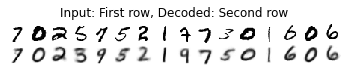

In [48]:
file_name = '../Imagenes/input_and_decoded.png'
reconstruction_image(img_original= x_test, img_decoded=autoencoder.predict(x_test), 
                         image_size=28, num_images= 20, random=True,
                         file_name=file_name)

## Representación latente

In [44]:
def plot2D(x_latent, y_label,
           sample_percent = 100, #show 100% by default
           xmin=-4.0, ymin=-4.0,
           xmax=4.0,  ymax=4.0,
           filename=None,
           xlabel='Dim 1',
           ylabel='Dim 2',
           title='Latent Space-2D'):
    
    
    # select sample to reduce the data
    if sample_percent>=100:
        sample_percent= 100
    elif sample_percent<=0:
        sample_percent= 10
    if sample_percent!=100:
        shape_0 = x_latent.shape[0]
        size = int(shape_0*sample_percent/100)
        index = index = np.random.randint(low=0, high=shape_0, size=size)
        z = x_latent[index]
        y_test = y_label[index]
    else:
        z = x_latent
        y_test = y_label
    
    
    # configure the plot
    #fig, ax = plt.subplots(figsize=(20, 16))
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    ax.set_title(title,fontsize=15)
    ax.grid(True)
    
    # plot
    #plt.scatter(z[:, 0], z[:, 1], marker="")
    ax.scatter(z[:, 0], z[:, 1], c=y_label ,alpha=0.1, edgecolors='none')
    for i, digit in enumerate(y_test):
        ax.annotate(digit, (z[i, 0], z[i, 1]))
   
    # save the plot
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    
   

In [46]:
# extract encoding data to future use
x_train_latent = encoder(x_train)
x_train_latent = x_train_latent.numpy()

x_test_latent = encoder(x_test)
x_test_latent = x_test_latent.numpy()

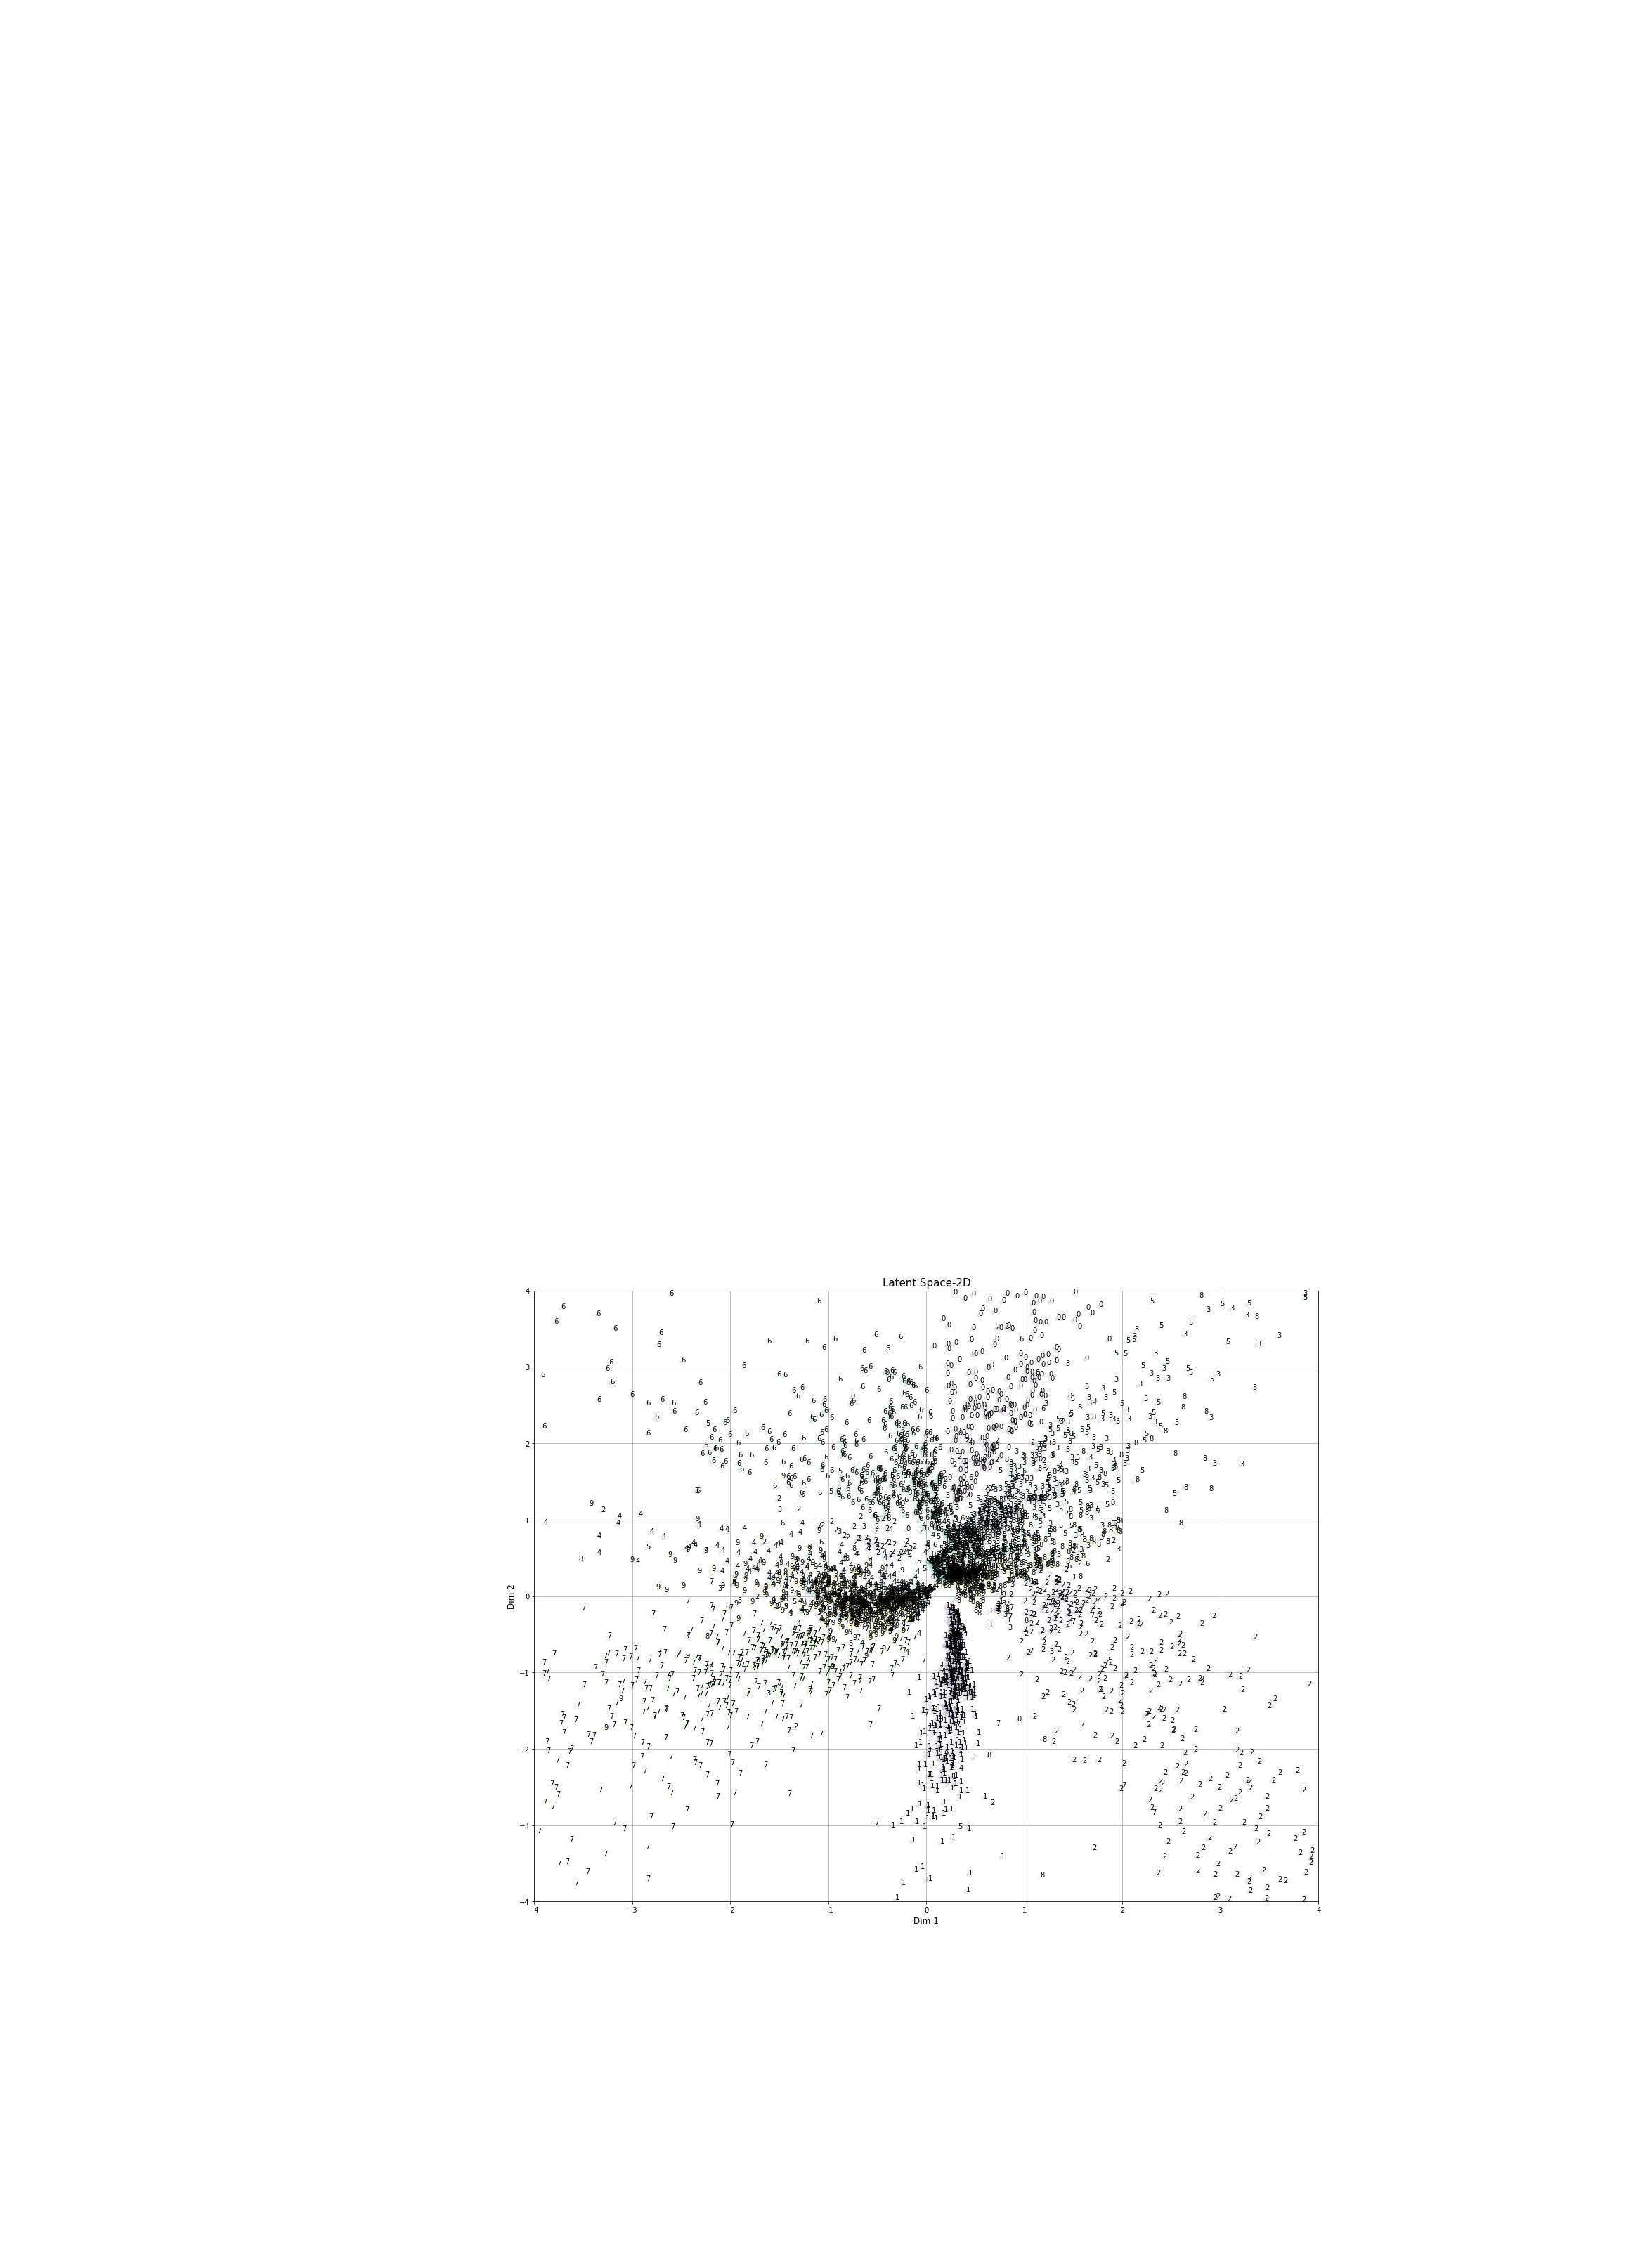

In [47]:
filename='../Imagenes/latent_2D_space_minist.png'
plot2D(x_test_latent[0::2], y_test[0::2], filename=filename)# Comienza en el índice 0 toma cada dos posiciones